https://docs.google.com/document/d/1QA6Taf__0gUcNQ2aQKI1if-9WUcS-nndBVOZcQugkws/edit

https://www.kongakura.fr/article/Random-Forest-explication-et-impl%C3%A9mentation-avec-sklearn%20python-machine%20learning-

https://www.google.com/search?client=ubuntu&channel=fs&tbm=vid&sxsrf=ALeKk0384SZY-fib3Ui5HorSUSWlmNVKHQ:1611588183424&q=machine+learnia+data+visualisation&sa=X&ved=2ahUKEwiCusnpsbfuAhWnDGMBHaAIBNYQ8ccDKAR6BAgFEBQ&biw=1366&bih=588

https://docs.google.com/document/d/1MVIe9JhM-PsgQK6zu0J0vS6Z1G7jkcEeTuoZT1_3i-U/edit

https://randerson112358.medium.com/heart-disease-detection-using-machine-learning-python-a701f39396cb

# Risques Cardio-Vasculaires


To-Do


En vous appuyant sur ces données, Construisez un modèle de Random Forest permettant de prédire qui sont les sujets à risque !

Réaliser une veille sur les Random Forest.

Utiliser un jupyter-notebook pour le travail qui suit.

Visualiser et analyser les données avec les librairies Matplotlib et Seaborn.

Résoudre le cas d’étude présenté ci-dessus avec la librairie Scikit-Learn (exploration des données, préparation des données, modélisation, le test et l’interprétation des résultats).

Prédire si Arthur 53 ans, fumeur, sportif, 175 cm, 85 kg, avec un taux de cholestérol au dessus de la normal et un taux de glucose normal, une tension artérielle systolique dans la moyenne et une pression sanguine diastolique correspondant à la moyenne du 3e quartile (50%-75%) du jeu de données, est un sujet à risques cardio-vasculaires.

Rendre accessible votre notebook via Github.

Partager votre lien github.



In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [60]:
df = pd.read_csv('cardio_train.csv', sep = ';',index_col=0)
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [61]:
df.shape

(70000, 12)

In [62]:
df.info

<bound method DataFrame.info of          age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                             
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
99993  19240       2     168    76.0    120     80            1     1      1   
99995  22601       1     158   126.0    140     90            2     2      0   
99996  19066       2     183   105.0    180     90            3     1      0   
99998  22431       1     163    72.0    135     80            1     2      0   
99999  2

In [75]:
#verifie les valeurs nul dans chaque colonne
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
years          0
dtype: int64

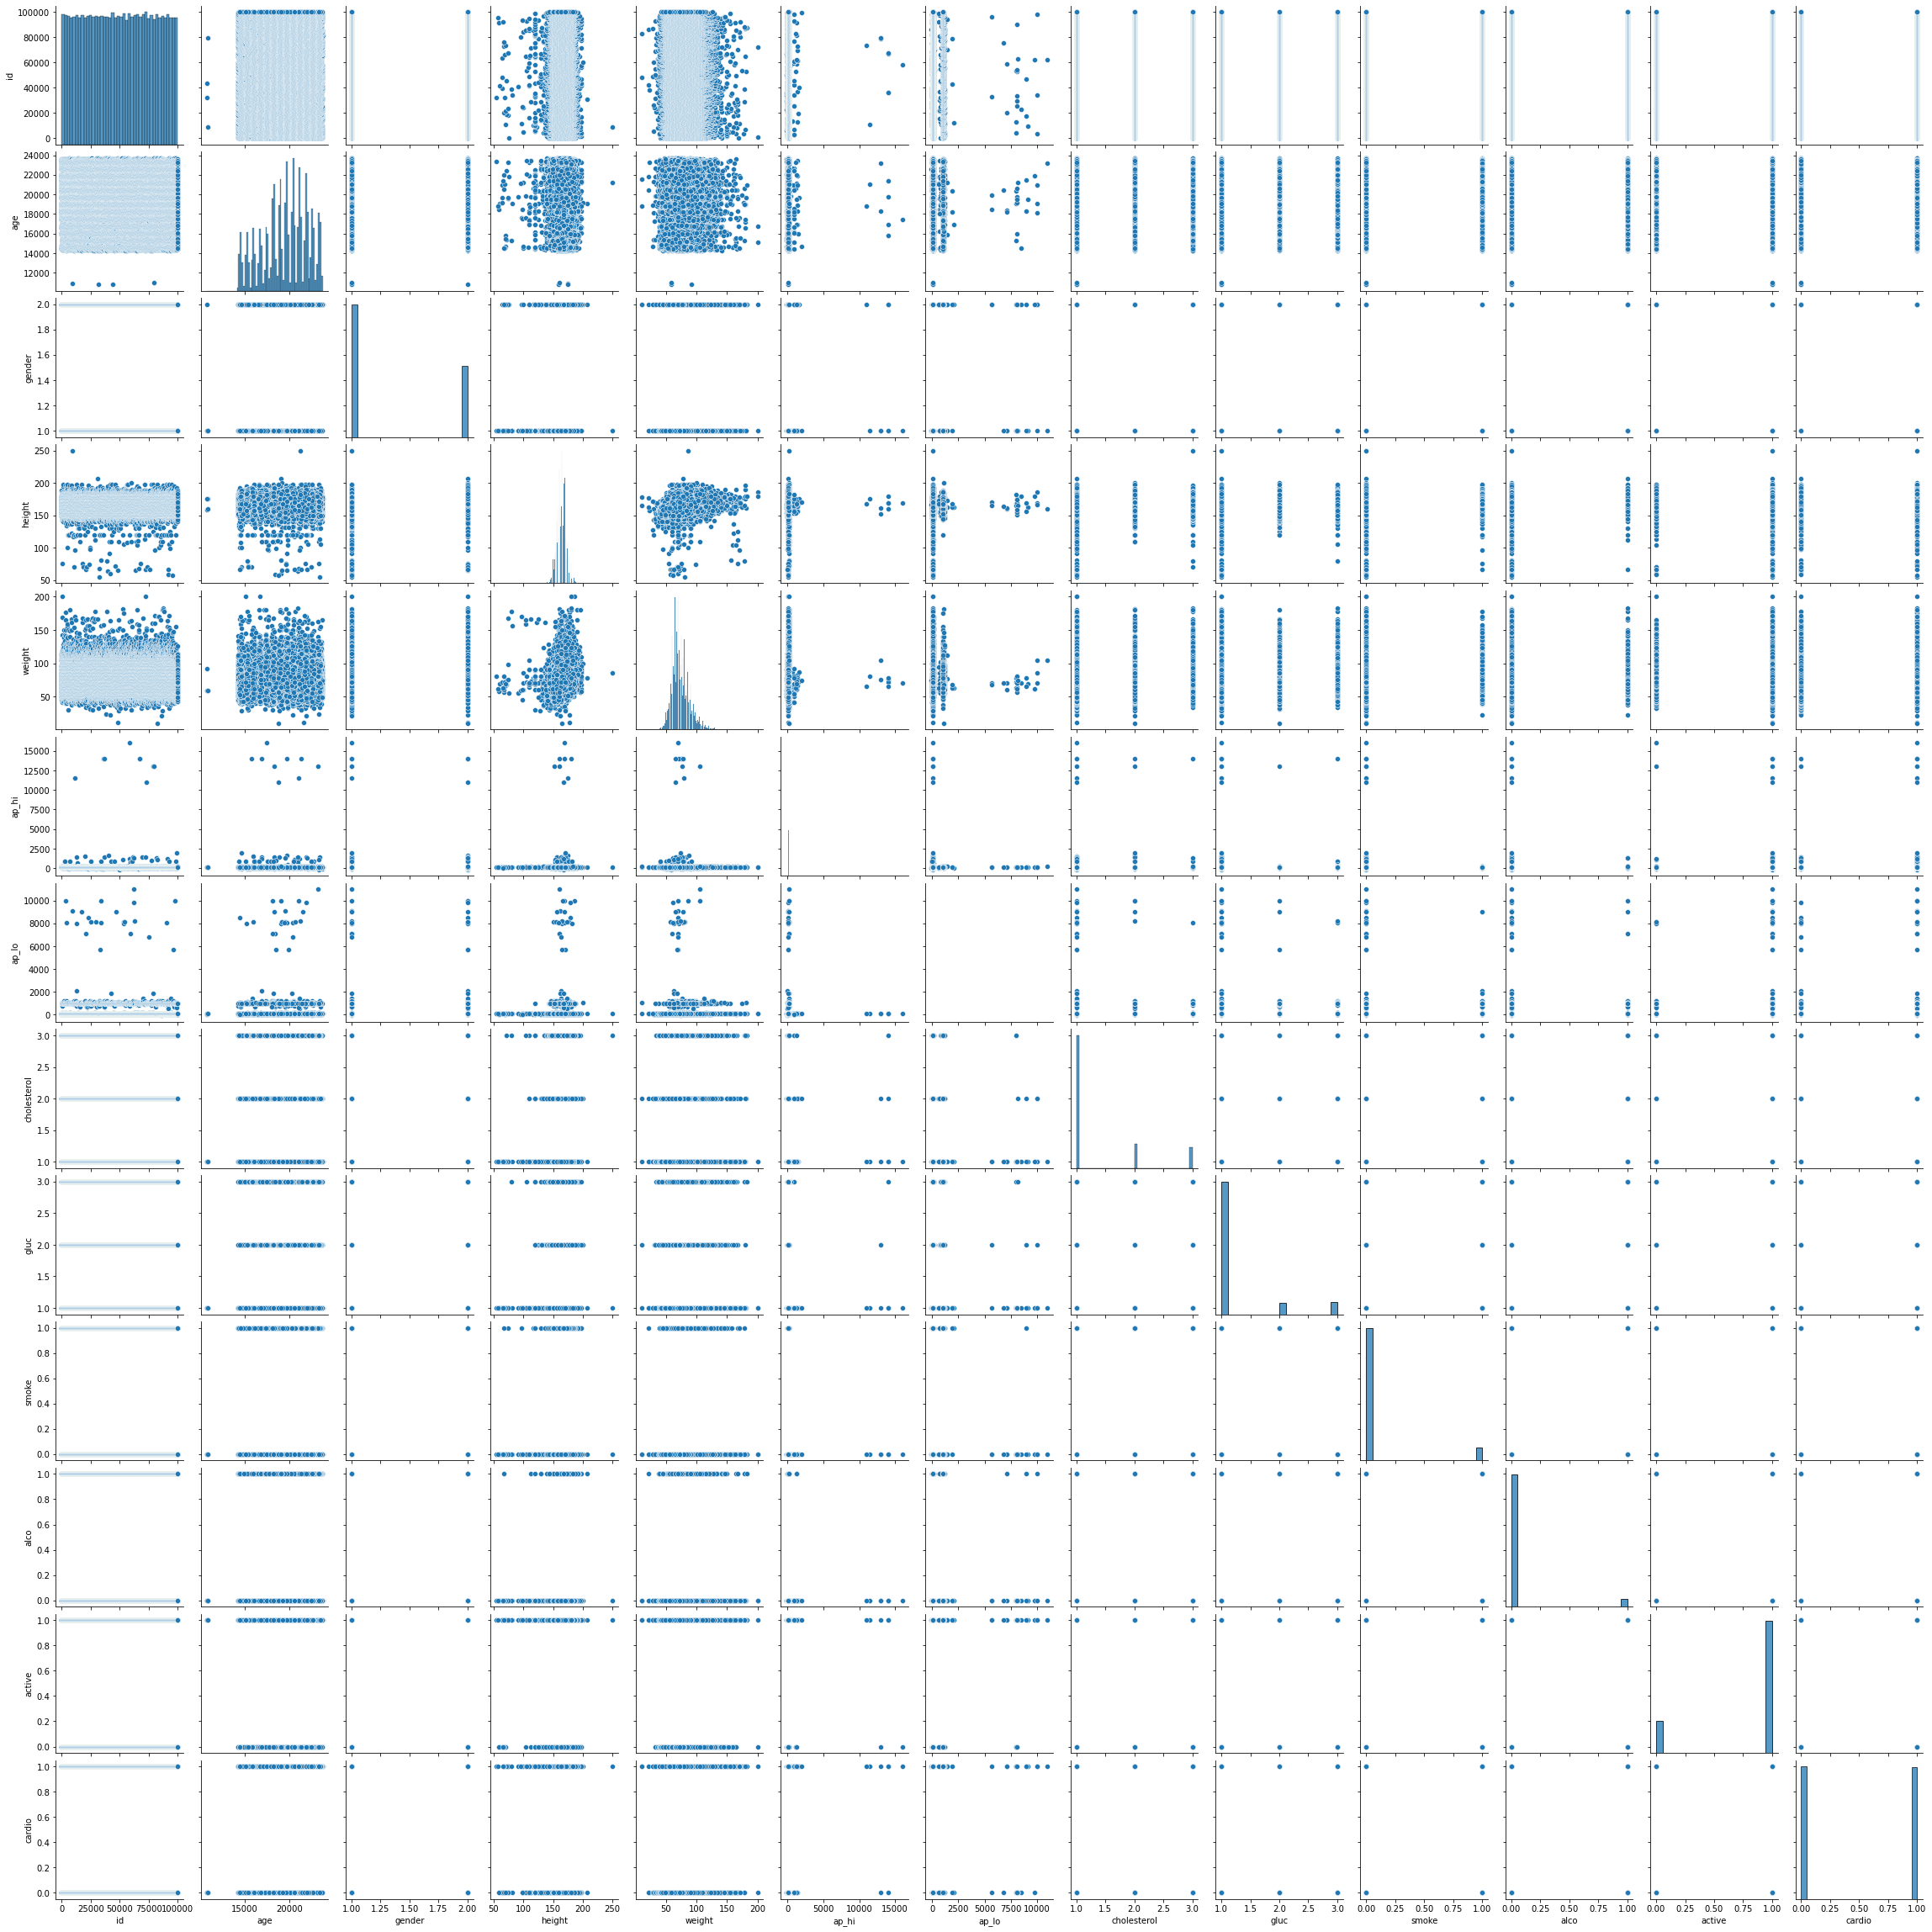

In [10]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'ap_hi'}>,
        <AxesSubplot:title={'center':'ap_lo'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'gluc'}>,
        <AxesSubplot:title={'center':'smoke'}>],
       [<AxesSubplot:title={'center':'alco'}>,
        <AxesSubplot:title={'center':'active'}>,
        <AxesSubplot:title={'center':'cardio'}>]], dtype=object)

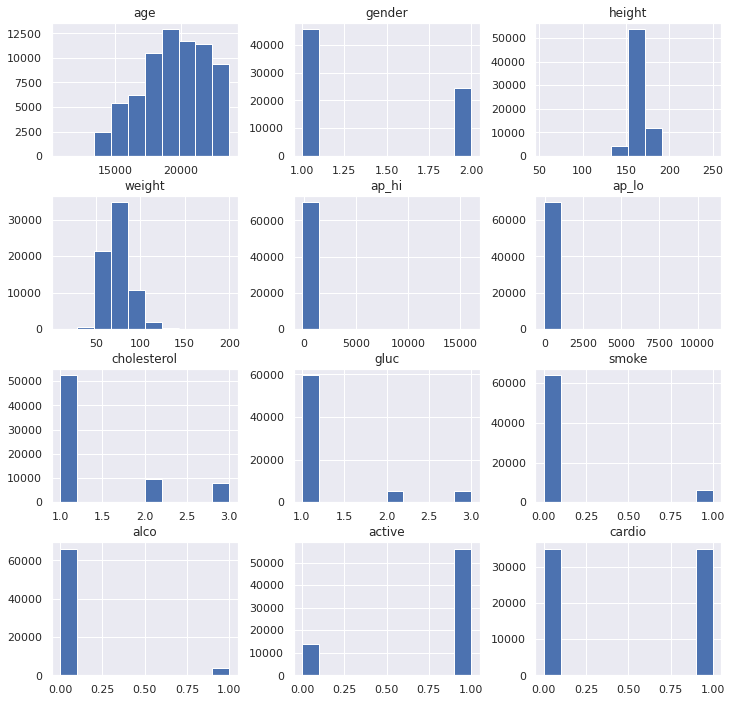

In [63]:
df.hist(figsize=(12,12))

In [76]:
#compte le nombre de personne malade et non malade
df ['cardio']. value_counts () 

0    35021
1    34979
Name: cardio, dtype: int64

/home/cecilia/anaconda3/envs/newbies/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cardio', ylabel='count'>

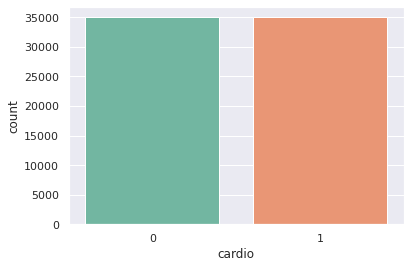

In [130]:
sns.countplot (df ['cardio'],palette="Set2")

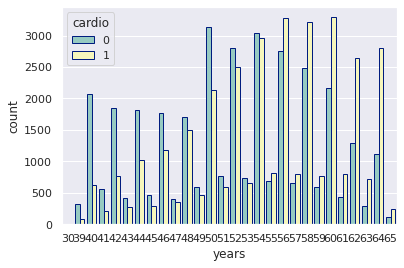

In [66]:
#le nombre de personnes atteintes d'une maladie cardiovasculaire qui dépasse
#creation d'une colonne année
df['years'] = ( df['age'] / 365).round(0) #transforme les jours en année
df["years"] = pd.to_numeric(df["years"],downcast='integer') # convertie les années en entier
#visualisation
sns.countplot(x='years', hue='cardio', data = df, palette="Set3", edgecolor=sns.color_palette("dark", n_colors = 1));

In [67]:
#correlation
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,-0.029918


<AxesSubplot:>

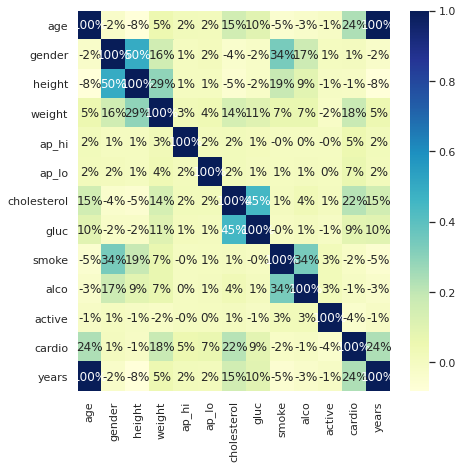

In [68]:
#visualisation de la correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))  
sns.heatmap(df.corr(), annot=True, fmt='.0%', cmap="YlGnBu")

In [83]:
#evite que l'algo donne une importance sup au 1 par raport o zero, transforme en binaire 
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [84]:
#divise le jeux de données en train et en test  #  VOIR AVEC STRATIFIED
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state = 1)

In [117]:
#mise à l'échelle
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [120]:
#définition du modèle 
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [121]:
#score de précision sur le jeux d'entrainement
forest.score(X_train, Y_train)

0.979904761904762

In [88]:
#teste le modele de precision sur le test
cm = confusion_matrix(Y_test, forest.predict(X_test))
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
#matrice de confusion
print(cm)
#précision des modèles sur les données de test
print('Model Test Accuracy = {}'. format( (TP + TN)/ (TP +TN + FN + FP)  ) )


[[6487 2122]
 [3093 5798]]
Model Test Accuracy = 0.702


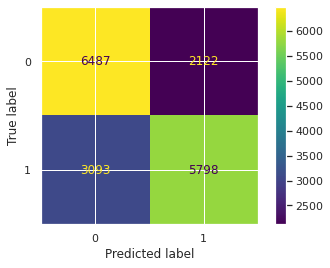

In [91]:
#plot de la matrice de confusion
plot_confusion_matrix(forest,X_test,Y_test)

In [99]:
#rapport de classification
Y_pred=forest.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      8609
           1       0.73      0.65      0.69      8891

    accuracy                           0.70     17500
   macro avg       0.70      0.70      0.70     17500
weighted avg       0.71      0.70      0.70     17500



In [122]:
#Prédiction pour le cas d'Arthur
arthur=sc.transform([[19345,2,175,85,129,90,2,1,1,0,1]])
forest.predict_proba(arthur)

array([[0.2, 0.8]])

In [126]:
#sortie en data frame non scalé attention, alors que modele oui
pd.DataFrame(forest.predict_proba(arthur))
#avec alcool

,0,1
0,0.2,0.8


In [129]:
arthur2=sc.transform([[53*365,2,175,85,129,90,2,1,1,1,1]])
pd.DataFrame(forest.predict_proba(arthur2))
#sans alcool

,0,1
0,0.2,0.8


Arthur a 80% de chance d'être malade